Linear Regression
Mean Absolute Error: 0.4373221679880281
Mean Squared Error: 0.7192609121440267
Root Mean Squared Error: 0.8480925139063702
R2 Score: 0.9994916519591258


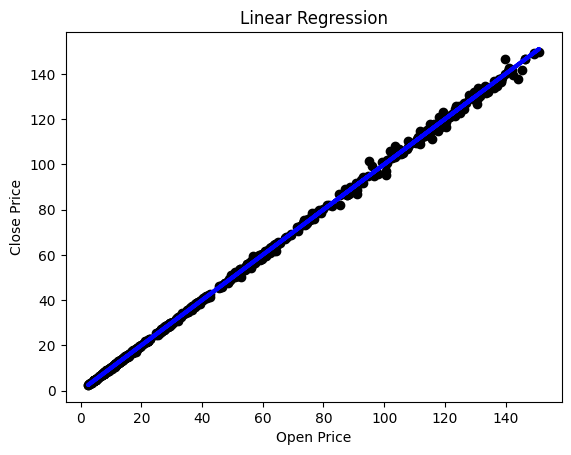

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("google_stock_price.csv")

# Feature and target variable
X = df[['Open']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Evaluation metrics
print("Linear Regression")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

# Plotting the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Linear Regression')
plt.show()


         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512


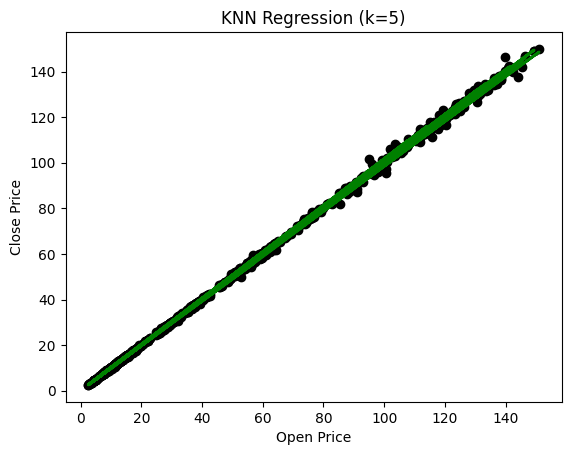

KNN Regression with (k=5)
Mean Absolute Error: 0.4977392084458295
Mean Squared Error: 0.892028342615042
Root Mean Squared Error: 0.9444725208363883
R2 Score: 0.9993695460816564



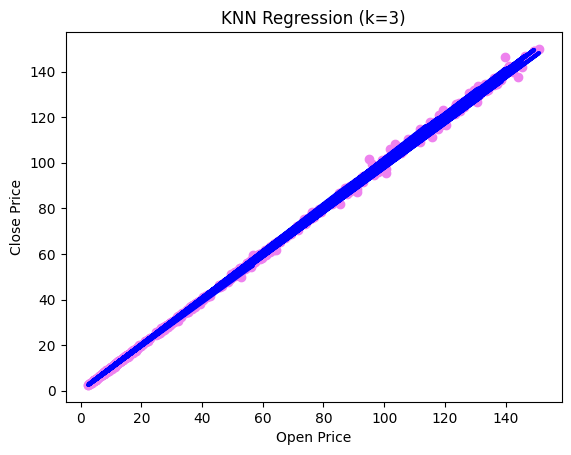

KNN Regression with k=3
Mean Absolute Error: 0.5116189548884794
Mean Squared Error: 0.9176542012281649
Root Mean Squared Error: 0.9579426920375587
R2 Score: 0.9993514346358628

Logistic Regression for Classification
Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.51      0.62      0.56       482
           1       0.52      0.40      0.45       487

    accuracy                           0.51       969
   macro avg       0.51      0.51      0.51       969
weighted avg       0.51      0.51      0.51       969

SVM for Classification
Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.50      0.60      0.55       482
           1       0.51      0.42      0.46       487

    accuracy                           0.51       969
   macro avg       0.51      0.51      0.50       969
weighted avg       0.51      0.51      0.50       969

Confusion Matrix:
[[287 195]
 [282 205]]
Classification Report:
             

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC


df = pd.read_csv("google_stock_price.csv")
df.head()
print(df.head())

#applying knn regression
#splitting the data into train and test
X = df[['Open']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k=5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title(f"KNN Regression (k={k})")
plt.show()
print("KNN Regression with (k=5)")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))
print("")






#checking accuracy of the model with different values of k
k=3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


# Plotting the results
plt.scatter(X_test, y_test, color='violet')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title(f"KNN Regression (k={k})")
plt.show()

print("KNN Regression with k=3")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))
print("")




df['Price_Up_Down'] = (df['Close'] > df['Open']).astype(int)

# Feature and target variable
X = df[['Open']]
y = df['Price_Up_Down']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression for classification
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression for Classification")
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


#SVM for classification
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("SVM for Classification")
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("")


*Confusion Matrix*
A confusion matrix is a table used in machine learning and classification tasks to evaluate the performance of a classification algorithm. It summarizes the results of a classification problem, showing the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

Here are the key terms in a confusion matrix:

1. **True Positive (TP):** The number of instances correctly predicted as positive by the model.

2. **True Negative (TN):** The number of instances correctly predicted as negative by the model.

3. **False Positive (FP):** The number of instances incorrectly predicted as positive by the model. Also known as a Type I error.

4. **False Negative (FN):** The number of instances incorrectly predicted as negative by the model. Also known as a Type II error.

The confusion matrix is especially useful when the classes are imbalanced, meaning one class occurs more frequently than the other. It provides a more detailed understanding of the performance of a classifier beyond simple accuracy.

From these four values, various performance metrics can be calculated, including:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

\[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \]

- **Precision (Positive Predictive Value):** The proportion of true positives among the instances predicted as positive.

\[ Precision = \frac{TP}{TP + FP} \]

- **Recall (Sensitivity or True Positive Rate):** The proportion of true positives among the instances that are actually positive.

\[ Recall = \frac{TP}{TP + FN} \]

- **F1 Score:** The harmonic mean of precision and recall, providing a balance between the two.

\[ F1 \, Score = \frac{2 \times Precision \times Recall}{Precision + Recall} \]

These metrics help to assess the model's performance in different aspects and are especially valuable in situations where the consequences of false positives and false negatives are different.